## LOGISTIC REGRESSION WITH NEURAL NETWORK MINDSET

In [1]:
#INITIALISING THE PARAMETERS
#CALCULATING THE COST FUNCTION AND GRADIENT FUNCTION
#GRADIENT DESCENT 

### PACKAGES

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#h5py is a common package to interact with a dataset that is stored on an H5 file.
import h5py
#PIL and scipy are used here to test your model with your own picture at the end.
from PIL import Image
from scipy import ndimage
from lr_utils import load_dataset

In [3]:
train=h5py.File('train_catvnoncat.h5','r')

In [4]:
train.keys()

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>

In [5]:
train_set_x=train.get('train_set_x')
train_set_y=train.get('train_set_y')

In [6]:
train_set_x[0]

array([[[17, 31, 56],
        [22, 33, 59],
        [25, 35, 62],
        ...,
        [ 1, 28, 57],
        [ 1, 26, 56],
        [ 1, 22, 51]],

       [[25, 36, 62],
        [28, 38, 64],
        [30, 40, 67],
        ...,
        [ 1, 27, 56],
        [ 1, 25, 55],
        [ 2, 21, 51]],

       [[32, 40, 67],
        [34, 42, 69],
        [35, 42, 70],
        ...,
        [ 1, 25, 55],
        [ 0, 24, 54],
        [ 1, 21, 51]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

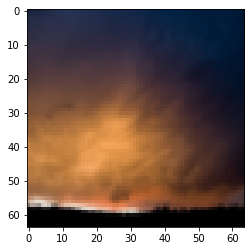

In [7]:
plt.imshow(train_set_x[0])

In [8]:
train_set_x.shape

(209, 64, 64, 3)

In [9]:
type(train_set_x)

h5py._hl.dataset.Dataset

In [10]:
#converting the dataset to numpy array
train_set_x=np.array(train_set_x)
train_set_y=np.array(train_set_y)

In [11]:
train_set_x[0]

array([[[17, 31, 56],
        [22, 33, 59],
        [25, 35, 62],
        ...,
        [ 1, 28, 57],
        [ 1, 26, 56],
        [ 1, 22, 51]],

       [[25, 36, 62],
        [28, 38, 64],
        [30, 40, 67],
        ...,
        [ 1, 27, 56],
        [ 1, 25, 55],
        [ 2, 21, 51]],

       [[32, 40, 67],
        [34, 42, 69],
        [35, 42, 70],
        ...,
        [ 1, 25, 55],
        [ 0, 24, 54],
        [ 1, 21, 51]],

       ...,

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]],

       [[ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0],
        ...,
        [ 0,  0,  0],
        [ 0,  0,  0],
        [ 0,  0,  0]]], dtype=uint8)

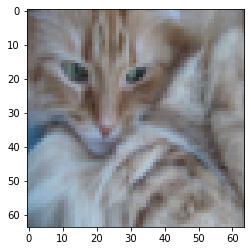

In [12]:
plt.imshow(train_set_x[2])

In [13]:
type(train_set_x)

numpy.ndarray

In [14]:
#importing the test data
test=h5py.File('test_catvnoncat.h5','r')
test.keys()

<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>

In [15]:
test_set_x=test.get('test_set_x')
test_set_y=test.get('test_set_y')

In [16]:
test_set_x=np.array(test_set_x)
test_set_y=np.array(test_set_y)

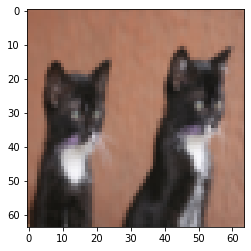

In [17]:
plt.imshow(test_set_x[0])

In [18]:
test_set_y[0]

1

In [19]:
#NO OF TRAINING EXAMPLES--- MTRAIN----m_train
#NO OF TESTING EXAMPLES---MTEST----m_test
#num_px  height =width

In [20]:
train_set_x.shape[0]

209

In [21]:
test_set_x.shape[0]

50

In [22]:
train_set_x.shape

(209, 64, 64, 3)

In [23]:
m_train=train_set_x.shape[0]
m_test=test_set_x.shape[0]
num_px=train_set_x.shape[1]
print('no of training examples is:',m_train)
print('no of testing examples is:',m_test)
print('height /width of the image is:',num_px)

no of training examples is: 209
no of testing examples is: 50
height /width of the image is: 64


In [24]:
#reshaping the picture array to column vector which will be useful for model learning
train_set_x.shape

(209, 64, 64, 3)

In [25]:
#flattenning the array using the reshape function
X_train_flatten=train_set_x.reshape(train_set_x.shape[1]*train_set_x.shape[2]*train_set_x.shape[3],train_set_x.shape[0])
X_test_flatten=test_set_x.reshape(test_set_x.shape[1]*test_set_x.shape[2]*test_set_x.shape[3],test_set_x.shape[0])

In [26]:
y_train=train_set_y.reshape(1,len(train_set_y))
y_test=test_set_y.reshape(1,len(test_set_y))

In [27]:
print('X_train_flatten shape:',X_train_flatten.shape)
print('X_test_flatten shape:',X_test_flatten.shape)
print()
print('y_train shape:',y_train.shape)
print('y_train shape:',y_test.shape)

X_train_flatten shape: (12288, 209)
X_test_flatten shape: (12288, 50)

y_train shape: (1, 209)
y_train shape: (1, 50)


### helper functions

In [28]:
def sigmoid(z):
    return (1/(1+np.exp(-z)))

In [29]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [30]:
#scaling the data
X_train=X_train_flatten/255
X_test=X_test_flatten/255

In [31]:
#initialising the parametrs
def initialize_with_zero(dim):
    w=np.zeros((dim,1))
    b=0
    assert(w.shape == (dim, 1))
    assert(isinstance(b, float) or isinstance(b, int))
    
    return w, b


In [32]:
dim=2
w,b=initialize_with_zero(dim)
print('w:\n',w)
print('b:\n',b)

w:
 [[0.]
 [0.]]
b:
 0


### forward and backward propagation

In [33]:
#impelemnting a function that computes cost function and gradient
def propagate(w,b,X,Y):
    """
    Implement the cost function and its gradient for the propagation explained above

    Arguments:
    w -- weights, a numpy array of size (num_px * num_px * 3, 1)
    b -- bias, a scalar
    X -- data of size (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat) of size (1, number of examples)

    Return:
    cost -- negative log-likelihood cost for logistic regression
    dw -- gradient of the loss with respect to w, thus same shape as w
    db -- gradient of the loss with respect to b, thus same shape as b
    
    Tips:
    - Write your code step by step for the propagation. np.log(), np.dot()
    """
    m=X.shape[1]
    
    #froward propagation
    A=sigmoid(np.dot(w.T,X)+b)
    cost=-(1/m)*(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))
    
    #backward propagation
    dw=np.dot(X,(A-Y).T)/m
    db=np.sum(A-Y)/m
    
    assert(dw.shape == w.shape)
    assert(db.dtype == float)
    cost = np.squeeze(cost)
    assert(cost.shape == ())
    
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost


In [34]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = 0.001455578136784208
cost = 5.801545319394553


### updating the parameters using a function

In [35]:
def optimize(w,b,X,Y,num_iter,learning_rate,print_cost=False):
    costs=[]
    for i in range(num_iter):
        grads, cost = propagate(w, b, X, Y)
        
        dw=grads['dw']
        db=grads['db']
        
        #updating
        w=w-learning_rate*dw
        b=b-learning_rate*db
        #appending the cost for every 100 th iteration
        
        if i%100==0:
            costs.append(cost)
        if i%100==0 and print_cost:
            print ("Cost after iteration %i: %f" %(i, cost))
    params={'w':w,'b':b}
    grads={'dw':dw,'db':db}
    
    return params,grads,costs

In [36]:
params, grads, costs = optimize(w, b, X, Y, num_iter= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067654


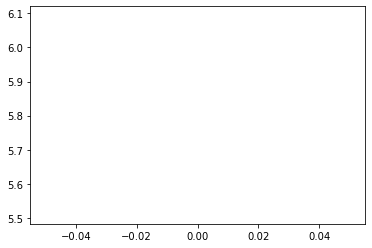

In [37]:
import matplotlib.pyplot as plt
plt.plot(costs)


In [38]:
costs

[5.801545319394553]

In [39]:
#creating a prediction function
def predict(w,b,X):
    m=X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X) + b)           
    
    Y_prediction = (A >= 0.5) * 1.0
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction


In [40]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


### merge al functions into a model

In [41]:
X_train_flatten.shape

(12288, 209)

In [47]:
def model(X_train,X_test,y_train,y_test,num_iterations=2000,learning_rate=0.5,print_cost=False):
    
    #initialise the parameters
    w,b=initialize_with_zero(X_train_flatten.shape[0])
    
    #gradient descent
    parameters, grads, costs = optimize(w, b, X_train, y_train, num_iterations, learning_rate, print_cost)
    
    #retriving the w and b
    w=parameters['w']
    b=parameters['b']
    
    #doing the prediction
    y_train_predict=predict(w,b,X_train)
    y_test_predict=predict(w,b,X_test)
    
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_train_predict - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_test_predict - y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": y_test_predict, 
         "Y_prediction_train" : y_train_predict, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d
    

In [61]:
d = model(X_train_flatten,X_test_flatten,y_train,y_test, num_iterations = 3000, learning_rate = 0.005, print_cost = False)


<ipython-input-28-e917b25034e6>:2: RuntimeWarning: overflow encountered in exp
  return (1/(1+np.exp(-z)))
<ipython-input-33-50469626b816>:24: RuntimeWarning: divide by zero encountered in log
  cost=-(1/m)*(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))
<ipython-input-33-50469626b816>:24: RuntimeWarning: invalid value encountered in multiply
  cost=-(1/m)*(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))


train accuracy: 77.03349282296651 %
test accuracy: 34.0 %


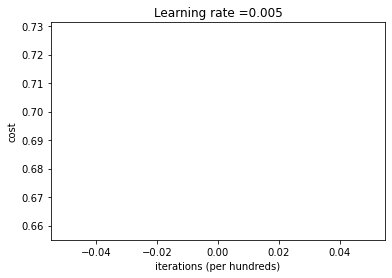

In [62]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

In [63]:
d['costs']

[0.6931471805599453,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan]

In [66]:
learning_rates = [0.01, 0.001, 0.0001]

#creating a different number of models
models={}
for i in learning_rates:
    print ("learning rate is: " + str(i))
    models[str(i)]=model(X_train,
    X_test,
    y_train,
    y_test,
    num_iterations=2000,
    learning_rate=i,
    print_cost=False,)
    print ('\n' + "-------------------------------------------------------" + '\n')

learning rate is: 0.01
train accuracy: 73.6842105263158 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 74.64114832535886 %
test accuracy: 34.0 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 66.98564593301435 %
test accuracy: 34.0 %

-------------------------------------------------------



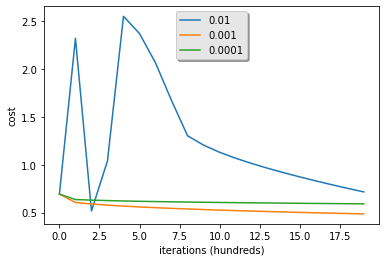

In [67]:
#graphs for different learnign rate
for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label= str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()